In [102]:
#Process jobs for labeling:
#We will use the first fifty jobs in the bc jobs dataset because they are the most likely to be tech related. 

from nltk import sent_tokenize

job_sentences = []
for job in unmodified_jobs[:50]:
    descrip = job["descrip"]
    descrip = descrip.split("•") 
    for line in descrip:
        line = sent_tokenize(line)
        job_sentences = job_sentences + line


#Check it twas done properly.
len(job_sentences)

1709

In [103]:
#Shuffle job sentences.
from sklearn.utils import shuffle

job_sentences = shuffle(job_sentences, random_state=42)

Code needed to write sentences to a file -- this is only done if you want to relabel those sentences or label some more. Currently, 350 sentences are labeled.

In [104]:
#Categories to label. 
#Salary --> S
#Technical Skill --> TS
#Soft Skill --> SS
#Corporate Jargon --> CJ
#Experience --> E
#Degree --> D

#f = open("labeled_sentneces.txt", "w")

#for sentence in job_sentences[400:600]:
#    f.write(sentence + " : " + "\n")


#f.close()

Read labeled sentences

In [105]:
f = open("labeled_sentneces.txt", "r")

text = str(f.read())
print(type(text))
f.close()

sentences = text.split("\n")

labeled_sentences = []

for sentence in sentences:
    labeled_sentence = sentence.split(":")
    if(len(labeled_sentence) == 2):
        labeled_sentences.append(labeled_sentence)

len(labeled_sentences)

<class 'str'>


191

In [106]:
f = open("/Users/rachelralph/Desktop/Job Description Shennanigans/labeled_sentneces2.txt", "r")

text = str(f.read())
print(type(text))
f.close()

sentences = text.split("\n")

for sentence in sentences:
    labeled_sentence = sentence.split(":")
    if(len(labeled_sentence) == 2):
        labeled_sentences.append(labeled_sentence)

len(labeled_sentences)

<class 'str'>


369

In [107]:
f = open("/Users/rachelralph/Desktop/Job Description Shennanigans/labeled_sentneces4.txt", "r")


text = str(f.read())
print(type(text))
f.close()


sentences = text.split("\n")

for sentence in sentences:
    labeled_sentence = sentence.split(":")
    if(len(labeled_sentence) == 2):
        labeled_sentences.append(labeled_sentence)

len(labeled_sentences)


f.close()

len(labeled_sentences)

<class 'str'>


545

In [108]:
#Provide counts of how many sentences were labelled for each category.


def count_types(labeled_sentences):
    CJ = 0
    E = 0
    TS = 0
    SS = 0
    D = 0
    S = 0
    other = 0
    
    other_sent = []
    
    for i in range(len(labeled_sentences)):
        labeled_sentences[i][1] = labeled_sentences[i][1].strip()
        label = labeled_sentences[i][1]
    
        if label == "CJ":
            CJ += 1
        elif label == "E":
            E += 1
        elif label == "TS":
            TS += 1
        elif label == "SS":
            SS += 1
        elif label == "D":
            D += 1
        elif label == "S":
            S += 1
        else:
            other += 1
            other_sent.append(i)
    
    print("CJ: ", CJ, "\n E: ", E)
    print("TS: ", TS, "\nSS: ", SS)
    print(" D: ", D, "\n S: ", S)
    print("OTHER: ", other)

    return other_sent

other_sent = count_types(labeled_sentences)

CJ:  278 
 E:  20
TS:  170 
SS:  39
 D:  8 
 S:  12
OTHER:  18


In [109]:
#Remove sentences that were mislabeled from the dataset

adj = 0
for index in other_sent:
    labeled_sentences.pop(index - adj)
    adj += 1

In [110]:
#Check that worked

count_types(labeled_sentences)

CJ:  278 
 E:  20
TS:  170 
SS:  39
 D:  8 
 S:  12
OTHER:  0


[]

In [111]:
X = []
y = []

for sentence in labeled_sentences:
    X.append(sentence[0])
    y.append(sentence[1])

In [112]:
import nltk
import ssl
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

punct = [";", ".", ",", "!" "(", ")", ":"]

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


def job_descrip_preprocessing(sentences):

    for i in range(len(sentences)):
        print(i)
        sentence = sentences[i]
        print(sentence)
        sentence = sentence.lower()

        #remove punctuation
        sentence = "".join([w for w in sentence if w not in punct])
    
        #word tolkenize
        sentence = word_tokenize(sentence)
        
        #stem
        stemmer = PorterStemmer()
        sentence = [stemmer.stem(w) + " " for w in sentence if not w in stop_words]

        #Join for the randomforesting.
        sentences[i] = "".join(sentence)
    
    
    return sentences

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachelralph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
X = job_descrip_preprocessing(X)
X

0
WSP is committed to the principles of employment equity. 
1
Diverse perspectives and life experiences make us better. 
2
Be yourself, and more. 
3
Our approach is grounded on recognizing people's unique strengths and contributions and rewarding the value that they deliver.Our Total Rewards Package extends well beyond traditional compensation and benefit programs and is designed to recognize employee contributions, encourage personal wellness, and support firm growth. 
4
We regularly benchmark across a variety of positions, industries, sectors, targets, and levels. 
5
Easy to use Secure Remote Access and Mobility via SSL and IPsec VPN. 
6
By applying to this job you will be assessed against the Deloitte Global Talent Standards. 
7
 Maintain and document code using source control system 
8
Promote best practices within the team and organization 
9
Researches best practices in technical area; incorporating research into overall strategy and plans for pod development. 
10
Our Purpose is 

['wsp commit principl employ equiti ',
 'divers perspect life experi make us better ',
 '',
 "approach ground recogn peopl 's uniqu strength contribut reward valu deliverour total reward packag extend well beyond tradit compens benefit program design recogn employe contribut encourag person well support firm growth ",
 'regularli benchmark across varieti posit industri sector target level ',
 'easi use secur remot access mobil via ssl ipsec vpn ',
 'appli job assess deloitt global talent standard ',
 'maintain document code use sourc control system ',
 'promot best practic within team organ ',
 'research best practic technic area incorpor research overal strategi plan pod develop ',
 'purpos build better futur acceler expand access knowledg ',
 'assess current workforc identifi action skill gap ',
 'teamglob technolog servic work forefront technolog develop process support protect deloitt around world ',
 'group talent peopl want learn gain experi develop skill ',
 'shape make impact '

In [114]:
#Encode y as numbers

for i in range(len(y)):

    if y[i] == "CJ":
        y[i] = 0
    elif y[i] == "E":
        y[i] = 1
    elif y[i] == "TS":
        y[i] = 2
    elif y[i] == "SS":
        y[i] = 3
    elif y[i] == "D":
        y[i] = 4
    elif y[i] == "S":
       y[i] = 5
    else:
        print("PANNNICCC!")

In [115]:
#Encode X as a BOW format.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X = X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [117]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7421383647798742

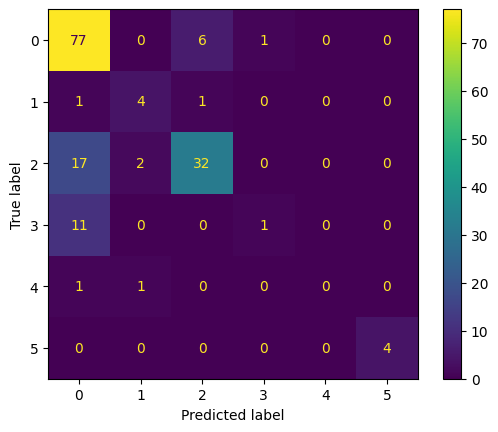

In [118]:
#Display a confusion matrix.

from sklearn.metrics import confusion_matrix

y_result = clf.predict(X_test)

cm = confusion_matrix(y_test, y_result, labels=clf.classes_)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

<h3>Confusion Matrix</h3>

This confusion matrix is normalized for the number of true labels are in the dataset. 
For clarity: The first row can be read as: If a sentences is labeled as corporate jargon, it has a 91% chance of being placed in corporate jargon, a 7% chance of being categorized as technical skill, and a 1% chance of being categorized as a soft skill.

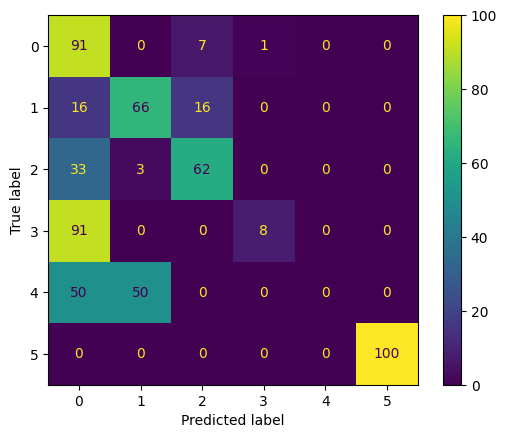

In [119]:
for i in range(len(cm)):
    all_results = y_test.count(i)
    for j in range(len(cm[i])):
        cm[i][j] = (float(cm[i][j]) / float(all_results)) * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

<h3>Confusion Matrix</h3>

This confusion matrix is normalized for the number of true labels are in the dataset. 
For clarity: The first column can be read as if something is labelled as corporate jargon, it as a 71% chance of actually being corporate jargon, a 15% chance of being a technical skill, and a 10% chance of being a soft skill. 

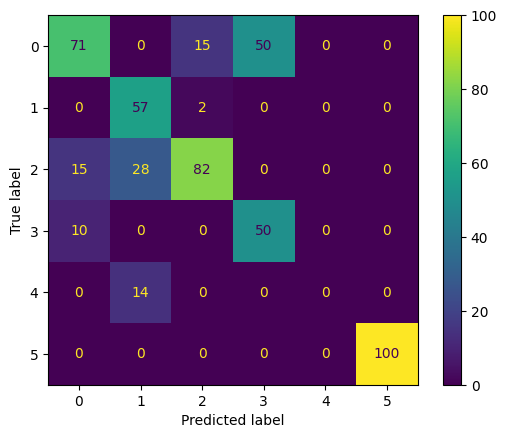

In [120]:
cm = confusion_matrix(y_test, y_result, labels=clf.classes_)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        all_results = y_result.tolist().count(j)
        if all_results != 0:
            cm[i][j] = (float(cm[i][j]) / float(all_results)) * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()